In [1]:
"""
Probablistic Machine Learning - Task List 3
"""

%matplotlib inline
import math

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
# Utils
def animate_frame_histogram(idx, subplot, get_data_fn):
    subplot.clear()
    sns.distplot(get_data_fn(idx), kde=False)
    
def make_animation(animation_fn, begin_idx, nb_steps, get_data_fn, skip_frame=1):
    fig, plot = plt.subplots(1, 1)
    anim = animation.FuncAnimation(fig, animation_fn,
                                  frames=range(begin_idx, nb_steps, skip_frame),
                                  interval=50,
                                  fargs=(plot, get_data_fn))
    return anim

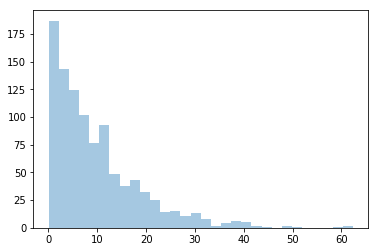

In [3]:
# Exercise 1
# Simple introduction
def generate_samples(k, n, scale=5):
    return np.random.exponential(scale=scale, size=(k, n))


def exercise_1_1(k, n_max, scale):
    means = []
    
    for idx in range(1, n_max + 1):
        samples = generate_samples(k, idx, scale=scale)
        means.append(np.mean(samples, axis=1))
    
    return make_animation(animate_frame_histogram, 
                          0, n_max,
                          lambda i: means[i])
    
        

scale = 10
k = 1000  # nb samples    
n_max = 25  # single sample size
anim = exercise_1_1(k, n_max, scale)
HTML(anim.to_jshtml())

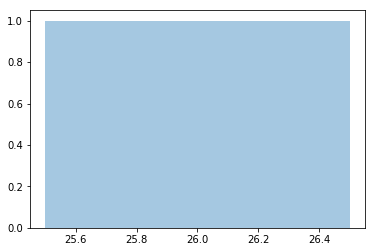

In [4]:
# Bernoulli
def generate_trials(p, nb_trials):
    return np.random.binomial(1, p, nb_trials)

def exercise_1_2(p, nb_trials, nb_repeat):
    nb_successes = []
    for idx in range(nb_repeat):
        nb_successes.append(sum(generate_trials(p, nb_trials)))
    
    return make_animation(animate_frame_histogram,
                          1, nb_repeat,
                          lambda i: nb_successes[:i])
    

P = 0.5
NB_TRIALS = 50
NB_REPEAT = 100
anim = exercise_1_2(P, NB_TRIALS, NB_REPEAT)
HTML(anim.to_jshtml())

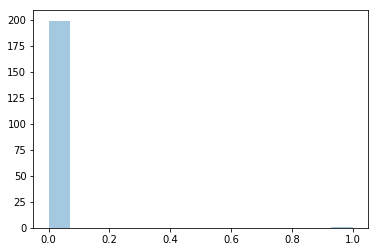

In [12]:
# Multinomial
def exercise_1_3(nb_experiments, nb_probs):
    data = []
    for idx in range(nb_experiments):
        data.append(np.random.multinomial(idx, [1.0/nb_probs] * nb_probs))
    
    return make_animation(animate_frame_histogram,
                          1, nb_experiments,
                          lambda i: data[i],
                          skip_frame=100)
    

NB_EXPERIMENTS = 1000
NB_PROBS = 200
anim = exercise_1_3(NB_EXPERIMENTS, NB_PROBS)
HTML(anim.to_jshtml())

In [4]:
# Exercise 2
attributes = ['Sex', 'Length', 'Diameter', 'Height', 
              'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'
             ] 
target= 'Rings'
df_abalone = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
                         header=None, names=attributes + [target])

In [5]:
# Remove non-numeric attribute 'Sex'
del df_abalone['Sex']
attributes.remove('Sex')

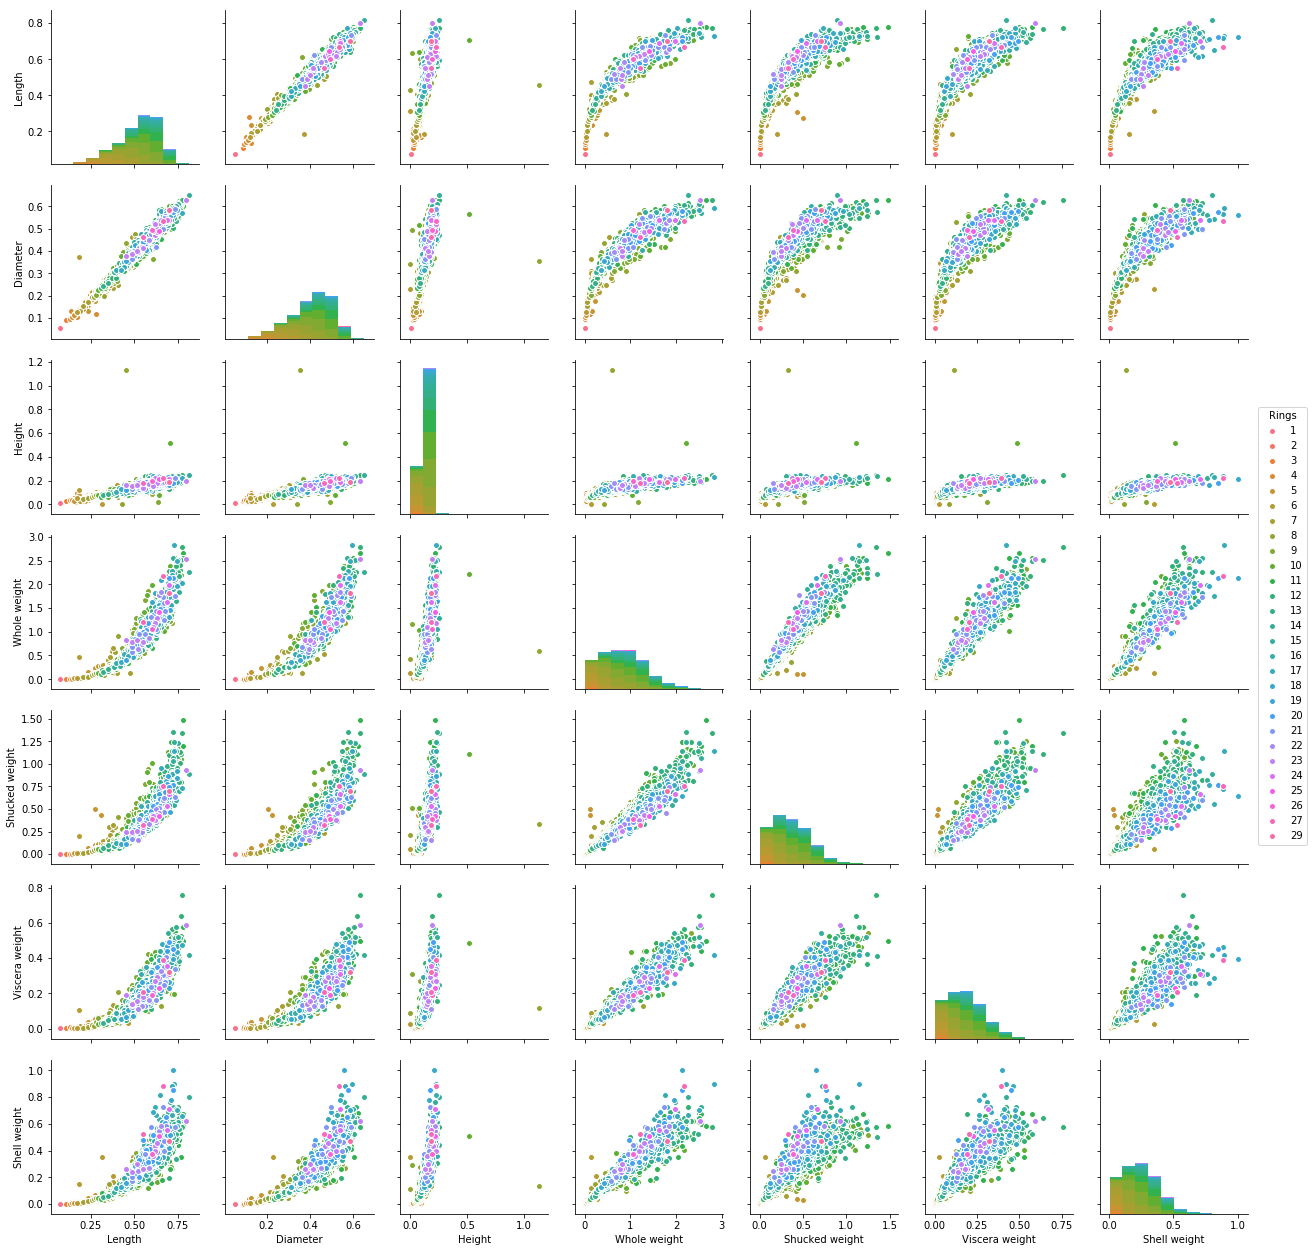

In [9]:
sns.pairplot(df_abalone, x_vars=attributes, y_vars=attributes, hue='Rings')

In [2]:
# https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

('Length', 'Length')
('Length', 'Diameter')
('Length', 'Height')
('Length', 'Whole weight')
('Length', 'Shucked weight')
('Length', 'Viscera weight')
('Length', 'Shell weight')
('Length', 'Rings')
('Diameter', 'Length')
('Diameter', 'Diameter')
('Diameter', 'Height')
('Diameter', 'Whole weight')
('Diameter', 'Shucked weight')
('Diameter', 'Viscera weight')
('Diameter', 'Shell weight')
('Diameter', 'Rings')
('Height', 'Length')
('Height', 'Diameter')
('Height', 'Height')
('Height', 'Whole weight')
('Height', 'Shucked weight')
('Height', 'Viscera weight')
('Height', 'Shell weight')
('Height', 'Rings')
('Whole weight', 'Length')
('Whole weight', 'Diameter')
('Whole weight', 'Height')
('Whole weight', 'Whole weight')
('Whole weight', 'Shucked weight')
('Whole weight', 'Viscera weight')
('Whole weight', 'Shell weight')
('Whole weight', 'Rings')
('Shucked weight', 'Length')
('Shucked weight', 'Diameter')
('Shucked weight', 'Height')
('Shucked weight', 'Whole weight')
('Shucked weight', 'Shuc

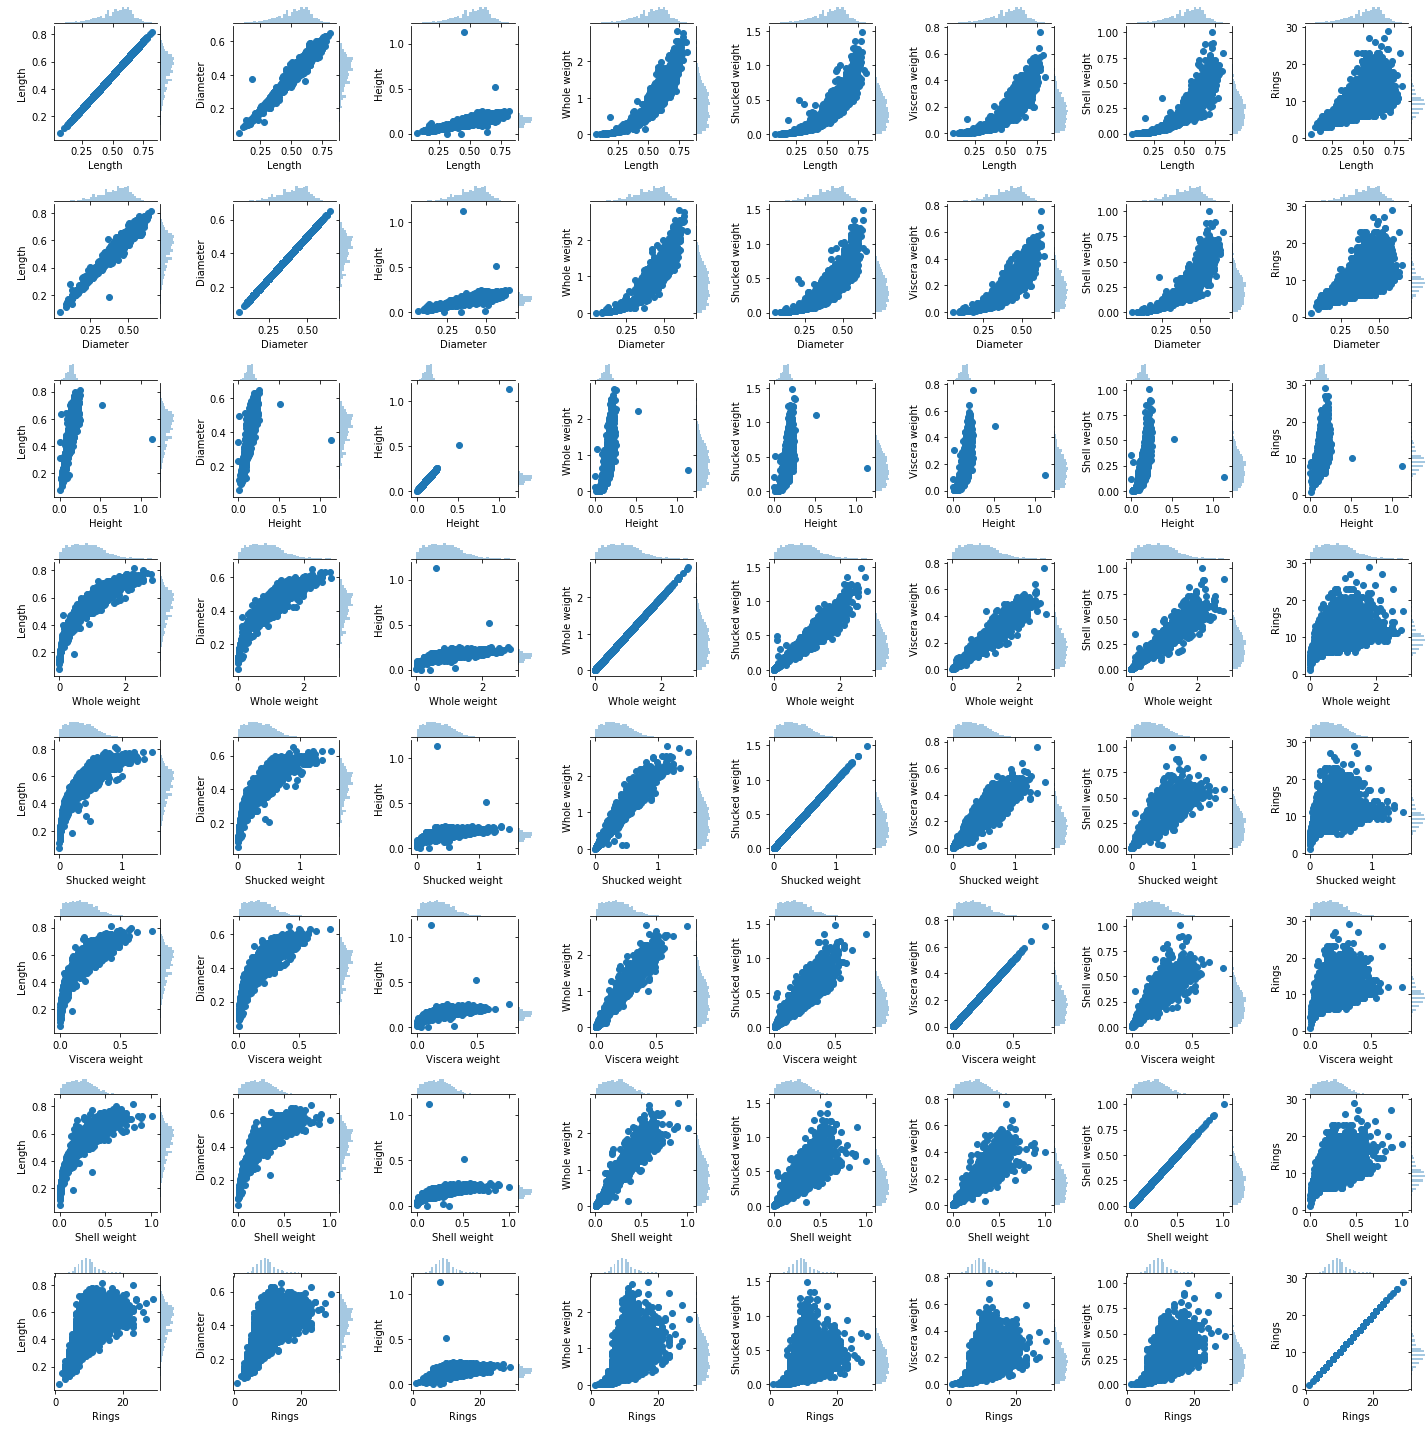

In [10]:
nb_attributes = len(attributes)

fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(nb_attributes, nb_attributes)

import itertools
for idx, pair in enumerate(itertools.product(attributes, repeat=2)):
    print(pair)
    jp = sns.jointplot(x=pair[0], y=pair[1], data=df_abalone, stat_func=None)
    SeabornFig2Grid(jp, fig, gs[idx])
    
gs.tight_layout(fig)
plt.show()

In [ ]:
del df_abalone['Rings']

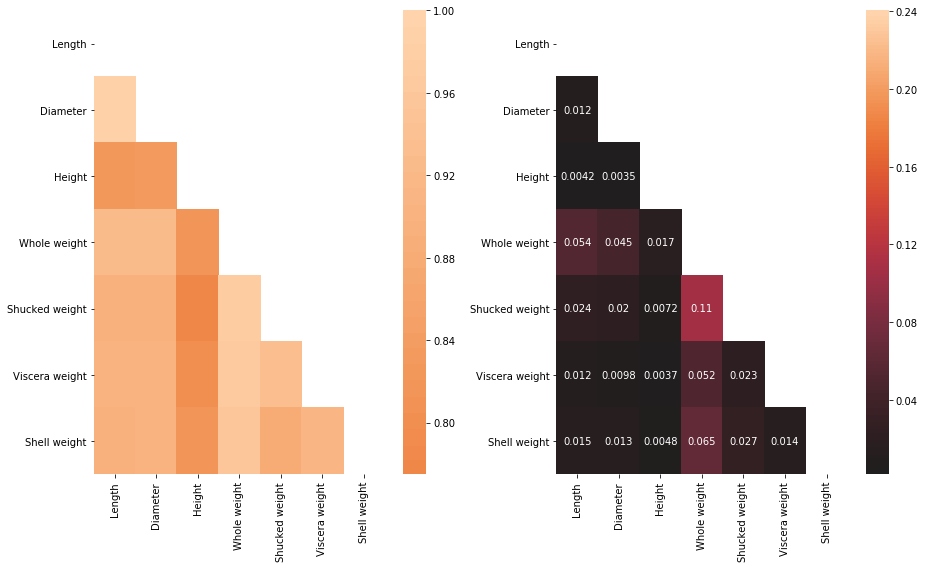

In [23]:
# Correlation & covariance
corr = df_abalone.corr()
cov = df_abalone.cov()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 8))

sns.heatmap(corr, mask=mask, center=0, annot=ax=ax1)
sns.heatmap(cov, mask=mask, center=0, annot=True, ax=ax2)

fig.tight_layout()